In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data=pd.read_csv("/kaggle/input/mydata/MYDATA.csv")

In [5]:

# Define the input features
num_features = ['age', 'MarketValue', 'Fee', 'YearOfTranfert', 'Height', 'Squad', 'Appearances', 'Goals', 'Assists', 'OwnGoals', 'SubsON', 'SubsOFF', 'YellowCards', 'SecondYellowCards', 'RedCards', 'PenaltyGoals', 'MinutesPerGoal', 'MinutesPlayed']
cat_features = ['position', 'Country', 'PreviousTeam', 'LeagueOfPreviousTeam', 'CountryOfPreviousTeam', 'NewTeam', 'LeagueOfNewTeam', 'CountryOfNewTeam']


In [6]:

# Define the input features
X = data.drop(['name', 'PPG'], axis=1)
y = data['PPG']*data['Appearances']*data['MarketValue']*data['Goals']*data['Assists']#*data['Fee']

# Encode the categorical features
cat_encoders = {}
for feature in cat_features:
    cat_encoders[feature] = LabelEncoder()
    X[feature] = cat_encoders[feature].fit_transform(X[feature])



In [7]:
X=X.drop('PlaceOfBirth',axis=1)
X=X.drop('Unnamed: 0',axis=1)

In [8]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 500}
# Define the model
rf_model = GradientBoostingRegressor(learning_rate= 0.1,n_estimators=500,max_depth=5, min_samples_split=10, min_samples_leaf=3, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
print("Random Forest Regression R^2 Score:", rf_model.score(X_test, y_test))



Random Forest Regression R^2 Score: 0.8987019548721019


In [9]:
new_data = pd.DataFrame({
    'age': [33],
    'position': ['Central Midfield'],
    'Country': [''],
    'MarketValue': [25],
    'PreviousTeam': [''],
    'LeagueOfPreviousTeam': [''],
    'CountryOfPreviousTeam': [''],
    'Fee': [20],
    'YearOfTranfert': [2024],
    'NewTeam': ['Barcelona'],
    'LeagueOfNewTeam': ['Laliga'],
    'CountryOfNewTeam': ['Spain'],
    'Height': [185],
    'Squad': [35],
    'Appearances': [35],
    #'PPG': [0.9],
    'Goals': [5],
    'Assists': [3],
    'OwnGoals': [0],
    'SubsON': [0],
    'SubsOFF': [9],
    'YellowCards': [8],
    'SecondYellowCards': [0],
    'RedCards': [0],
    'PenaltyGoals': [2],
    'MinutesPerGoal': [800],
    'MinutesPlayed': [3500]
})
for feature in cat_features:
    cat_encoders[feature] = LabelEncoder()
    new_data[feature] = cat_encoders[feature].fit_transform(new_data[feature])



In [10]:
# Make predictions
rf_predictions = rf_model.predict(new_data)
print(rf_predictions)

[7206.28194263]


In [11]:
#X_test_encoded = pd.DataFrame(index=X_test.index)
X_test_encoded=X
# Encode the categorical features in X_test
for feature in cat_features:
    encoder = LabelEncoder()
    X_test_encoded[feature] = encoder.fit_transform(X_test_encoded[feature])

# Concatenate the encoded X_test with the numeric X_test
#X_test_all = pd.concat([X_test_encoded, X_test[num_features]], axis=1)

# Get the predicted PPG values for all players in X_test
predicted_ppg = rf_model.predict(X_test_encoded)

# Find the index of the player in X_test with the closest predicted PPG to new_data
closest_indices = np.argsort(abs(predicted_ppg - rf_model.predict(new_data)))[:500]
print(closest_indices)


[11425  8300  9267  7333 16120  5577  3969 13351  8566 11463  8830 11140
  8406  3118  4471  7753 13029  3021 25874 15211  7483  4115  5971 10917
 20208 13258  9270    87   874 25827 24531  1153  1133 16355   535 22022
  7966 27485 18702  3261  7583  2699 10280  1027 19511 17629  4346  7174
  6418  8677  5970 10743 19437   690 11420 11588  9321 17852 24277 29640
 13821   851  5842 20955 14555  5801 16477 13271  8934 18440 24719 16002
  2152 27325 18031  8336 14969  6308 12764  9294  9131  9028 17037 29669
 23274 22706  8904  5788 20835  1072 25279 21102 23334 29599 20892 17729
 14141  9260 19666  8027 16018  6969  7638 24775 13153 20570  4163 16365
 12777  2638  7396 12933  1131  1151  6669 21428  6301  4512  1997 17745
 10912 21655 24903  9084  3924  8040 21546  4202 19286 19779 11355 29476
  6927  5858  1971 19799 21862  5779 11716   223 22318 15769 11393  3891
  7661 17162 18872  3433  8787 10756 13277  3816 10490  2989 12858  9017
 27452  6256 21130 19066  9418 21263 10288  6490 12

In [13]:
# Get the name of the closest player and print it out as the recommendation
print("Top 3 Recommendations:")
for i in closest_indices:
    if(data.iloc[i]['age']<=32 and data.iloc[i]['position']=='Central Midfield' and data.iloc[i]['YearOfTranfert'] in [2022,2021,2020,2019,2018,2017]):
        print(data.iloc[i]['name'])


Top 3 Recommendations:
Sander Berge 
Igor Gomes 
John McGinn 
Jakub Moder 
Mattias Svanberg 
Jude Bellingham 
Davide Frattesi 
Kacper Kozlowski 
Olivier Ntcham 
Jasmin Kurtic 
Badou Ndiaye 
Nadiem Amiri 
Marco Benassi 
Darijan Bojanic 
Andr? Horta 
Domagoj Pavicic 
P?? 
Nahitan N?dez 
A?sa La?ouni 


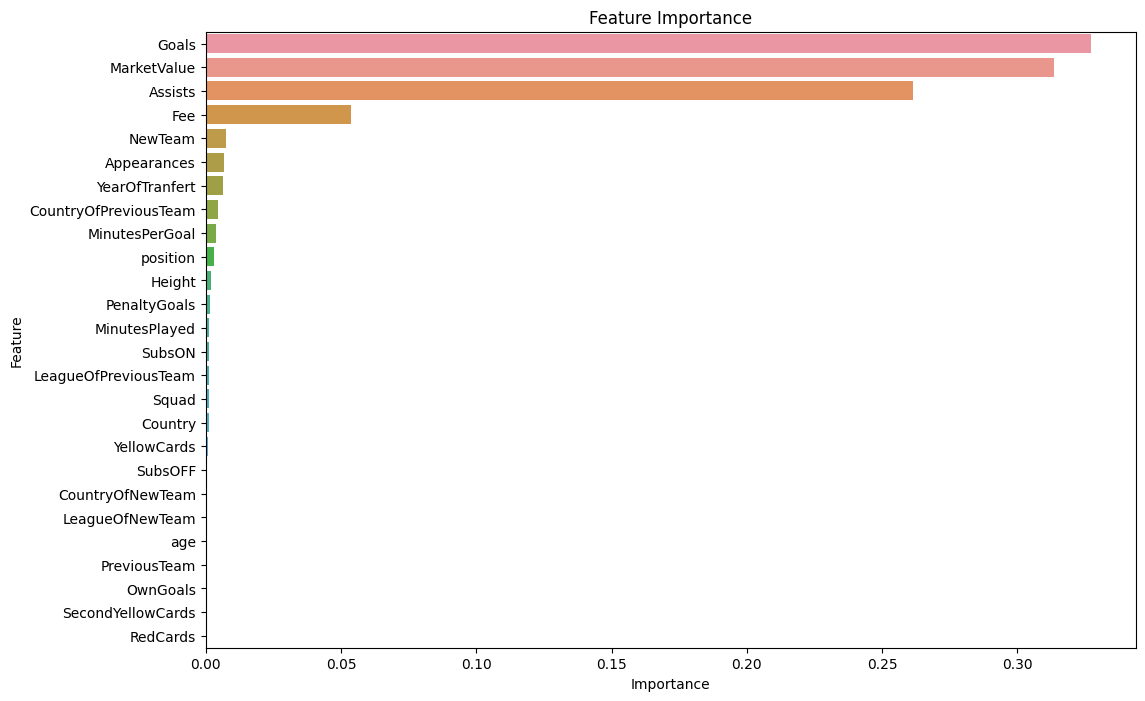

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get names of the features
feature_names = X.columns

# Create a datafr%ame with feature names and importance scores
feature_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort the dataframe by importance score in descending order
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Plot the feature importance using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [12]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],  # Possible values for n_estimators
    'learning_rate': [0.1],  # Possible values for learning_rate
    'max_depth': [5, 7],  # Possible values for max_depth
    'min_samples_split': [2, 5, 10],  # Possible values for min_samples_split
    'min_samples_leaf': [ 3, 5]  # Possible values for min_samples_leaf
}

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Store the results in a table
table_data = []
for params, mean_score, std_score in zip(grid_search.cv_results_['params'],
                                         grid_search.cv_results_['mean_test_score'],
                                         grid_search.cv_results_['std_test_score']):
    table_data.append([params['n_estimators'], params['learning_rate'],
                       params['max_depth'], params['min_samples_split'],
                       params['min_samples_leaf'], mean_score, std_score])

# Generate the table
table_headers = ['n_estimators', 'learning_rate', 'max_depth', 'min_samples_split',
                 'min_samples_leaf', 'Mean R^2 Score', 'Standard Deviation']
table = tabulate(table_data, headers=table_headers, floatfmt=".4f", tablefmt="grid")

print("Best Hyperparameters:", best_params)
print("Best R^2 Score:", best_score)
print("\nResults Table:")
print(table)

# Train the model with the best hyperparameters
gb_model = GradientBoostingRegressor(**best_params, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = gb_model.score(X_test, y_test)
print("\nGradient Boosting Regression R^2 Score:", test_score)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 500}
Best R^2 Score: 0.8857181972574253

Results Table:
+----------------+-----------------+-------------+---------------------+--------------------+------------------+----------------------+
|   n_estimators |   learning_rate |   max_depth |   min_samples_split |   min_samples_leaf |   Mean R^2 Score |   Standard Deviation |
+================+=================+=============+=====================+====================+==================+======================+
|            100 |          0.1000 |           5 |                   2 |                  3 |           0.8718 |               0.0324 |
+----------------+-----------------+-------------+---------------------+--------------------+------------------+----------------------+
|            200 |          0.1000 |           5 |                   2 |                  3 |           0.8754 |               0.0317 |
+--